In [1]:
from nltk.metrics import agreement
from scipy import stats

import pickle
import statistics
import matplotlib.pyplot as plt

In [2]:
modes = {}
annotations = {}
cols = ['1ab', '1ba', '2ab', '2ba', '3ab', '3ba']
ab = ['1ab', '2ab', '3ab']
ba = ['1ba', '2ba', '3ba']
for col in cols:
    annotations[col] = []
    
with open('annotations.csv', 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:
        convo_id, index, *a = line.rstrip().split(',')
        if '' in a:
            continue
        for i in range(len(cols)):
            annotations[cols[i]].append(a[i])
        modes[convo_id] = (statistics.mode(a[::2]), statistics.mode(a[1::2]))

In [3]:
data = []
for k in [ab, ba]:
    idx = 'ab' if k is ab else 'ba'
    for i in range(len(k)):
        lst = annotations[k[i]]
        for j in range(len(lst)):
            data.append((str(i), str(j) + idx, lst[j]))

In [4]:
atask = agreement.AnnotationTask(data=data)

print("Fleiss's Kappa:", atask.multi_kappa())

Fleiss's Kappa: 0.2716269134923461


In [5]:
with open('full_results_annotations.pkl', 'rb') as file:
    result = pickle.load(file)

In [6]:
lsms = {}
for corpus in result:
    for convo in result[corpus]:
        lsms[convo['convID']] = convo

In [7]:
symm = {}
for convo_id, labels in modes.items():
    if labels not in symm:
        symm[labels] = []
    if convo_id not in lsms:
        print(convo_id)
        continue
    symm[labels].append(lsms[convo_id]['mean_LSM'])

648423195.135356.135356
e6hmhtc


In [8]:
nn = symm[('No', 'No')]
yy = symm[('Yes', 'Yes')]
yn = symm[('Yes', 'No')] + symm[('No', 'Yes')]

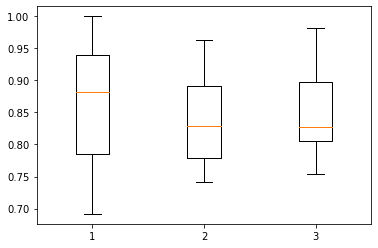

In [9]:
plt.boxplot([nn, yy, yn])
plt.show()

In [10]:
yes = []
no = []
for convo_id, labels in modes.items():
    for i in range(len(labels)): 
        label = labels[i]
        if convo_id not in lsms:
            print(convo_id)
            continue
        direction = 'mean_C_a_b' if i == 0 else 'mean_C_b_a'
        if label == 'Yes':
            yes.append(lsms[convo_id][direction])
        else:
            no.append(lsms[convo_id][direction])

648423195.135356.135356
648423195.135356.135356
e6hmhtc
e6hmhtc


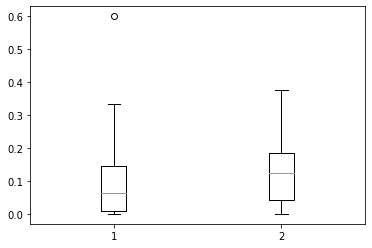

Ttest_indResult(statistic=-0.4038876715729715, pvalue=0.6893489522538458)

In [11]:
plt.boxplot([no, yes])
plt.show()
stats.ttest_ind(no, yes, equal_var=False)